## Perform feature engineering using FFT and generate custom features of images to train a image classifier
<hr>

In this project, a collection of custom fourier space features are generated in order to train and test a neural network classifier instead of using image pixels values for the training. The image pre-processing steps contain several FFT-based feature engineering tasks that generate the following custom features:
* Fourier co-efficients
* Magnitude
* Phase angle and
* Sector index 

These extracted features are then directly used for training a neural network classifier. 
The feature engineering process is explained in the following exploratory data analysis section.

### Exploratory Data Analysis:

In [91]:
from matplotlib import pyplot as plt
from skimage import io

from dataset import *
from fft import *

The input images used in this project are of different shape as shown below.

In [93]:
import os
import numpy as np
from PIL import Image, ImageOps
from matplotlib import pyplot as plt
from skimage import io
import math
import cmath
import random


def load_images(data_root='data'):
    """
    load image pixle values into numpy array
    the class labels are extracted from image name
    """
    image_files = [x for x in os.listdir(data_root) if 'jpg' in x]
    image_np_dict = {
        'deer': [],
        'horse': [],
        'squirrel': [],
        'tiger': []
    }

    print('INFO: reading images..')
    for file in image_files:
        # print(f'INFO: reading image file: {file}')
        label = file.split('-')[0]
        img = io.imread(f'{data_root}/{file}', as_gray=True)
        # img = img / np.max(img)
        image_np_dict[label].append(img)

    # image_np_dict['deer'] = np.array(image_np_dict['deer'])
    # image_np_dict['horse'] = np.array(image_np_dict['horse'])
    # image_np_dict['squirrel'] = np.array(image_np_dict['squirrel'])
    # image_np_dict['tiger'] = np.array(image_np_dict['tiger'])
    class_labels = list(image_np_dict.keys())

    print('INFO: reading images complete')
    return image_np_dict, class_labels




In [94]:
image_np_dict, class_labels = load_images()

for label, data in image_np_dict.items():
    print(f'INFO: sample {label} data shape: {data[0].shape}')

INFO: reading images..
INFO: reading images complete
INFO: sample deer data shape: (1500, 1500)
INFO: sample horse data shape: (1000, 1000)
INFO: sample squirrel data shape: (1500, 1500)
INFO: sample tiger data shape: (1500, 1500)


INFO: class labels: tiger, deer, horse squirrel


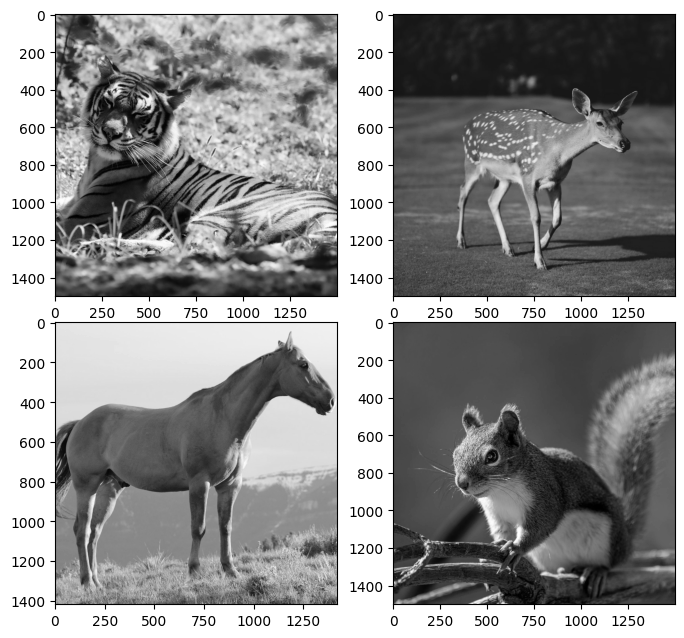

In [96]:
plt.rcParams["figure.figsize"] = (8,8)
f, axarr = plt.subplots(2, 2, gridspec_kw = {'hspace':0})
axarr[0,0].imshow(image_np_dict['tiger'][0], cmap='gray')
axarr[0,1].imshow(image_np_dict['deer'][0], cmap='gray')
axarr[1,0].imshow(image_np_dict['horse'][4], cmap='gray')
axarr[1,1].imshow(image_np_dict['squirrel'][0], cmap='gray')

print('INFO: class labels: tiger, deer, horse squirrel')

FFT (Fast Fourier Transform) algorithm is applied to each image that will generate a set of fourier co-efficients. Each co-efficient is complex-valued and is a combination of a real part Re(u)
and an imaginary part Im(u).

<img class="pimg" src="imgs/1.png" width="190">

The magnitude and phase angle of a signal can be described by these real and imaginary
components. If we plot a complex-valued F(u) in a polar coordinate form (Re, Im), then
the magnitude is the Euclidean distance between the center and the plotted point.

<img class="pimg" src="imgs/2.png" width="390">

The phase angle θ is the amount of clockwise rotation of the plotted point from the positive real
axis. 
The magnitude r and phase angle θ can be computed using the following equations.

<img class="pimg" src="imgs/3.png" width="160">
<img class="pimg" src="imgs/4.png" width="130">

The following function call will compute the fourier co-efficients and magnitudes for each image.

In [98]:
coefficients_np_dict, mag_np_dict = compute_fourier_coefficients_and_magnitude(image_np_dict)

print(f'\nINFO: sample fourier co-efficient: {coefficients_np_dict["deer"][0][0][0]}')
print(f'\nINFO: sample magnitude: {mag_np_dict["deer"][0][0][0]}')

INFO: computing fourier coefficients of deer data
INFO: computing fourier coefficients of horse data
INFO: computing fourier coefficients of squirrel data
INFO: computing fourier coefficients of tiger data
INFO: computing fourier coefficients complete

INFO: sample fourier co-efficient: (-9.68761137254899-1.3322676295501878e-15j)

INFO: sample magnitude: 9.68761137254899


The diagram below show images for different class labels and their corresponding magnitude.

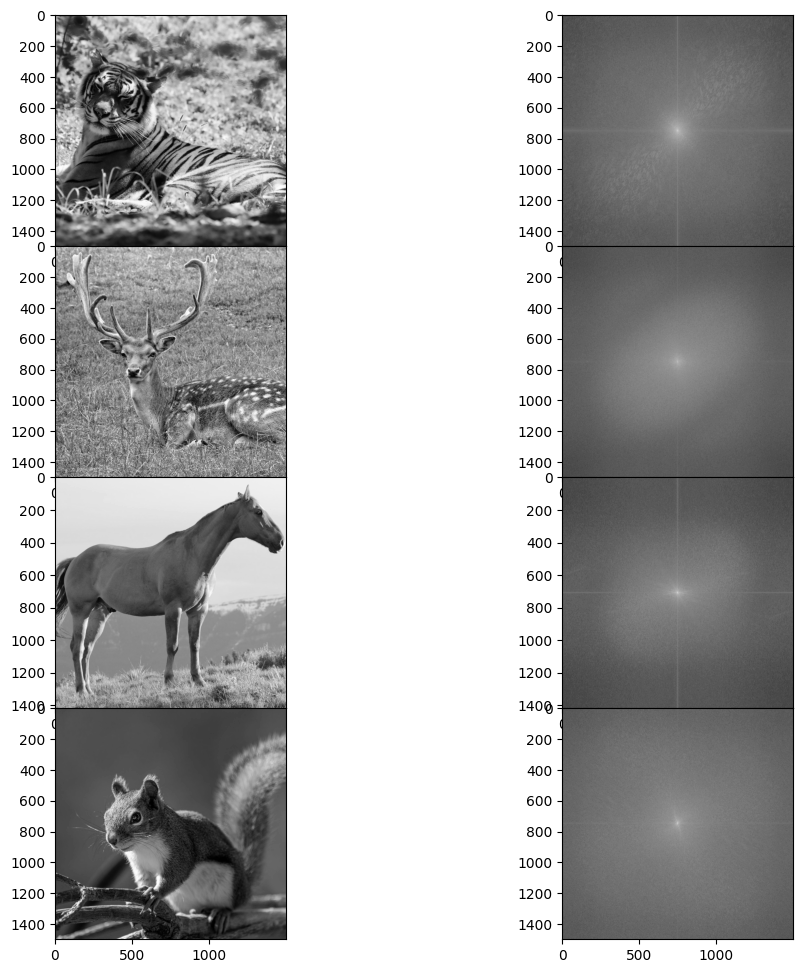

In [101]:
plt.rcParams["figure.figsize"] = (12,12)
f, axarr = plt.subplots(4, 2, gridspec_kw = {'hspace':0})
axarr[0,0].imshow(image_np_dict['tiger'][0], cmap='gray')
axarr[0,1].imshow(np.log(mag_np_dict['tiger'][0]), cmap='gray')
axarr[1,0].imshow(image_np_dict['deer'][4], cmap='gray')
axarr[1,1].imshow(np.log(mag_np_dict['deer'][4]), cmap='gray')
axarr[2,0].imshow(image_np_dict['horse'][4], cmap='gray')
axarr[2,1].imshow(np.log(mag_np_dict['horse'][4]), cmap='gray')
axarr[3,0].imshow(image_np_dict['squirrel'][0], cmap='gray')
axarr[3,1].imshow(np.log(mag_np_dict['squirrel'][1]), cmap='gray')

The reason of feature engineering in this project is to extract fourier co-efficients and other features and use these features for training neural network classifiers for image prediction. In the above magnitude images, the bright areas contain most of the information of the respective images. If we extract the values of these bright areas only and compute the magnitude, phase angle and sector index, then we can have a meaningful feature set that is smaller than the collection of original image pixels. Thus, training image classifiers using these extracted features can reduce the overall training time. A fixed number of co-efficients are extracted for each image in this project. The following histogram show how fourier magnitude values are distributed.

In [50]:
flatten_coeff_dict, flatten_mag_dict = flatten_and_sort_coefficients_and_magnitudes(coefficients_np_dict, mag_np_dict)
gripped_data_dict = grip_first_n_items(flatten_coeff_dict, 100)

INFO: flattening and sorting deer data
INFO: flattening and sorting horse data
INFO: flattening and sorting squirrel data
INFO: flattening and sorting tiger data
INFO: processing complete
INFO: gripping date of deer - limit: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: gripping date of horse - limit: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: gripping date of squirrel - limit: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: total value count: 100
INFO: total value

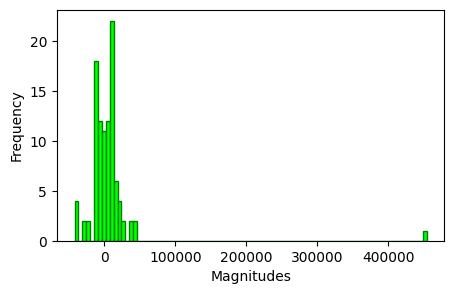

In [65]:
# plotting a histogram a sample deer image
plt.rcParams["figure.figsize"] = (5,3)
plt.hist(gripped_data_dict['horse'][0], bins=90, color='lime', edgecolor='green')
plt.xlabel('Magnitudes')
plt.ylabel('Frequency')
plt.show()

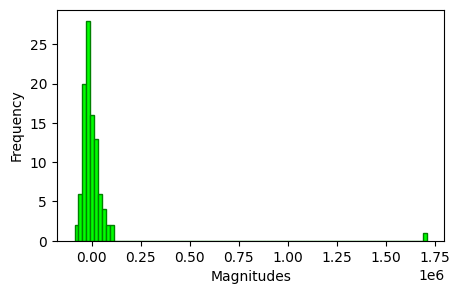

In [63]:
# plotting a histogram a sample tiger image
plt.rcParams["figure.figsize"] = (5,3)
plt.hist(gripped_data_dict['tiger'][0], bins=90, color='lime', edgecolor='green')
plt.xlabel('Magnitudes')
plt.ylabel('Frequency')
plt.show()

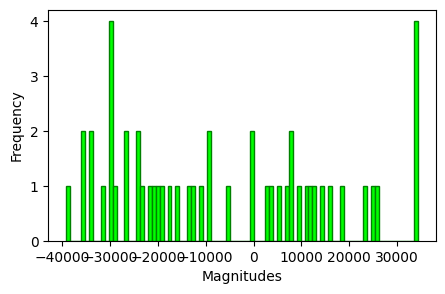

In [62]:
# plotting a histogram a sample tiger image
plt.rcParams["figure.figsize"] = (5,3)
plt.hist(gripped_data_dict['tiger'][0][50:], bins=90, color='lime', edgecolor='green')
plt.xlabel('Magnitudes')
plt.ylabel('Frequency')
plt.show()

In the last histogram above, first 50 coefficients are ignored. In most of the cases, the value of the first co-efficient magnitude is way higher than the others and it contains a lot more information compared to the others. The last co-efficient in the list will contain the least amount of information. Thus, first N number of co-efficients can be considered to compute the magnitude and other features that can be directly used for training the classifiers. 

### Building and Training Neural Network Model:

#### View model parameters:

In [70]:
import tensorflow as tf
import keras
from model import *

model = build_model_for_custom_fft_features()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 1024)              16778240  
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               

### Model Training:

The model training process can be started directly by calling the TRAIN function in run.py file.

Alternatively, the model can be trained by first gathering all features data by calling get_dataset_features_and_labels() function and then calling train() or train_custom_fft_features() functions.

In [44]:
"""
this function is included here just to visualize the different steps the function call 
in order to get the complete feature list. The actual function is implemented in fft.py file.
"""
def get_dataset_features_and_labels():
    """
    make function calls and compute needed features and class labels
    """
    print(f"{'-'*15} LOADING IMAGES {'-'*15}")
    image_np_dict, class_labels = load_images()

    print(f"{'-'*15} COMPUTE FOURIER COEFFICIENTS {'-'*15}")
    coefficients_np_dict, mag_np_dict = compute_fourier_coefficients_and_magnitude(image_np_dict)

    print(f"{'-'*15} FLATTEN AND SORT MAGNITUDE {'-'*15}")
    flatten_coeff_dict, flatten_mag_dict = flatten_and_sort_coefficients_and_magnitudes(coefficients_np_dict, mag_np_dict)

    print(f"{'-'*15} DATA SAMPLING {'-'*15}")
    sample_sizes = {
        # 64: (8, 8),
        # 256: (16, 16),
        # 1024: (32, 32),
        # 4096: (64, 64),
        # 16384: (128, 128),
        65536: (256, 256),
        # 262144: (512, 512)
    }
    n_samples = get_normalized_n_data_samples(flatten_coeff_dict, flatten_mag_dict, sample_sizes, [])

    print(f"{'-'*15} COMPUTING CUSTOM FFT FEATURES {'-'*15}")
    # get mag with custom features
    # total features: [mag, angle, sector, distance]
    # for 256,256 shape: [65536, 65536, 65536, 65536]
    train_custom_features_dict, test_custom_features_dict = compute_fft_custom_features(coefficients_np_dict)

    print(f"{'-'*15} TRAIN TEST SPLIT {'-'*15}")
    trainset_size_wise, train_labels_size_wise, testset_size_wise, test_labels_size_wise = train_test_split(
        n_samples
    )
    print('INFO: data processing complete!')

    return {
        'n_samples': n_samples, 'image_np_dict': image_np_dict, 'class_labels': class_labels,
        'coefficients_np_dict': coefficients_np_dict, 'mag_np_dict': mag_np_dict,
        'flatten_coeff_dict': flatten_coeff_dict, 'flatten_mag_dict': flatten_mag_dict,
        'trainset_size_wise': trainset_size_wise, 'train_labels_size_wise': train_labels_size_wise,
        'testset_size_wise': testset_size_wise, 'test_labels_size_wise': test_labels_size_wise,
        'train_custom_features_dict': train_custom_features_dict, 'test_custom_features_dict': test_custom_features_dict
    }

features_dict = get_dataset_features_and_labels()

--------------- LOADING IMAGES ---------------
INFO: reading images..
INFO: reading images complete
--------------- COMPUTE FOURIER COEFFICIENTS ---------------
INFO: computing fourier coefficients of deer data
INFO: computing fourier coefficients of horse data
INFO: computing fourier coefficients of squirrel data
INFO: computing fourier coefficients of tiger data
INFO: computing fourier coefficients complete
--------------- FLATTEN AND SORT MAGNITUDE ---------------
INFO: flattening and sorting deer data
INFO: flattening and sorting horse data
INFO: flattening and sorting squirrel data
INFO: flattening and sorting tiger data
INFO: processing complete
--------------- DATA SAMPLING ---------------
INFO: sampling and normalization complete
--------------- COMPUTING CUSTOM FFT FEATURES ---------------
INFO: computing fourier space custom features including magnitude
INFO: processing complete
--------------- TRAIN TEST SPLIT ---------------
INFO: data processing complete!


In [ ]:
from train import *

train(features_dict)

INFO: training for DIM: (128, 128)
trainset shape: (28, 128, 128)
train label shape: (28,)
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 1.3863 - accuracy: 0.2143
Epoch 2/10
1/1 [==============================] - 0s 272ms/step - loss: 1.3871 - accuracy: 0.2857
Epoch 3/10
1/1 [==============================] - 0s 262ms/step - loss: 1.3892 - accuracy: 0.2857
Epoch 4/10
1/1 [==============================] - 0s 273ms/step - loss: 1.3827 - accuracy: 0.3214
Epoch 5/10
1/1 [==============================] - 0s 257ms/step - loss: 1.3945 - accuracy: 0.1786
Epoch 6/10
1/1 [==============================] - 0s 255ms/step - loss: 1.3789 - accuracy: 0.2857
Epoch 7/10
1/1 [==============================] - 0s 267ms/step - loss: 1.3869 - accuracy: 0.3214
Epoch 8/10
1/1 [==============================] - 0s 476ms/step - loss: 1.3932 - accuracy: 0.3214
Epoch 9/10
1/1 [==============================] - 0s 246ms/step - loss: 1.3898 - accuracy: 0.2857
Epoch 10/10
1/1 [=============

##### Train by calling train_custom_fft_features() function. 

In [ ]:
train_custom_fft_features(features_dict)

INFO: training for custom fft features
INFO: training for custom fft features
INFO: training for custom fft features
INFO: training for custom fft features
tiger
trainset shape: (28, 4, 4096)
train label shape: (28,)
Epoch 1/10
14/14 [==============================] - 4s 187ms/step - loss: 7.1520 - accuracy: 0.1786
Epoch 2/10
14/14 [==============================] - 3s 243ms/step - loss: 12.3787 - accuracy: 0.2500
Epoch 3/10
14/14 [==============================] - 3s 189ms/step - loss: 3.4590 - accuracy: 0.4286
Epoch 4/10
14/14 [==============================] - 3s 216ms/step - loss: 3.1918 - accuracy: 0.2857
Epoch 5/10
14/14 [==============================] - 3s 237ms/step - loss: 1.8991 - accuracy: 0.2857
Epoch 6/10
14/14 [==============================] - 3s 239ms/step - loss: 1.5084 - accuracy: 0.3571
Epoch 7/10
14/14 [==============================] - 2s 179ms/step - loss: 1.5514 - accuracy: 0.1786
Epoch 8/10
14/14 [==============================] - 3s 181ms/step - loss: 1.4664 -

### Evaluate Model Accuracy:

In [ ]:
from test import *

evaluate_custom_fft_features_accuracy(features_dict)

INFO: testing for custom fft features
trainset shape: (3, 4, 4096)
train label shape: (3,)
1/1 - 0s - loss: 1.3903 - accuracy: 0.0000e+00 - 274ms/epoch - 274ms/step
INFO: test loss: 1.3902617692947388, test accuracy: 0.0
INFO: testing for custom fft features
trainset shape: (3, 4, 4096)
train label shape: (3,)
1/1 - 0s - loss: 1.3772 - accuracy: 1.0000 - 246ms/epoch - 246ms/step
INFO: test loss: 1.3772073984146118, test accuracy: 1.0
INFO: testing for custom fft features
trainset shape: (3, 4, 4096)
train label shape: (3,)
1/1 - 0s - loss: 1.3950 - accuracy: 0.0000e+00 - 252ms/epoch - 252ms/step
INFO: test loss: 1.3950179815292358, test accuracy: 0.0
INFO: testing for custom fft features
trainset shape: (3, 4, 4096)
train label shape: (3,)
1/1 - 0s - loss: 1.3828 - accuracy: 0.0000e+00 - 245ms/epoch - 245ms/step
INFO: test loss: 1.3827837705612183, test accuracy: 0.0


### Make Inference using the Trained Model

In [ ]:
from inference import *

extract_results_from_prediction()

INFO: making inference - input path: data/deer-1.jpg
INFO: loading model for data shape: (64, 64)
INFO: model loaded!
INFO: reading input image and computing fourier coefficients
INFO: grip first 4096 elements
(1, 4, 4096)
INFO: generating prediction matrix
1/1 [==============================] - 0s 26ms/step


'squirrel'

### Model Serving:

A Python-Flask API is developed to deploy the trained model and use it for making predictions on the new data. 
Using the API, an image can be sent from client/browser to the backend inference module. And the returning result is displayed in the UI.

<img class="pimg" src="imgs/5.png" width="490">



### Future Work:

The feature engineering module can be improved by generating more fourier space features. And then a new model can be build and train to compare the training and testing accuracy. Tweaking the neural network model by adding batch normalization and modifying dropout rate can also be done in order to check overall training and testing accuracy.

#### References:

1. Thomas Batard and Michel Berthier. “Spinor Fourier Transform for Image Processing”.
IEEE Transactions on Signal Processing, vol. 7, no. 4, 2013
2. Ben Karsin. “Parallel Fast Fourier Transform Literature Review”. Technical Report.
University of Hawaii, 2013